In [51]:
# Imports
import numpy as np
from scipy import stats

import plotly.graph_objects as go
from ipywidgets import interact

In [52]:

# Parameters
V = 120
D = 100
r = 0.05
σ = 0.2
T = 10

In [53]:
# Time to maturity
dt = 1/1000
tau = np.arange(dt, T+dt, dt)

In [54]:
# Normal CDF
N = lambda x: stats.norm.cdf(x)

H = lambda V, T, L: np.exp(-r*T) * N( (np.log(V/L) + (r-0.5*σ**2)*T) / (σ*np.sqrt(T)) )

In [55]:
# Black-Scholes Call price
def C_BS(V, K, T):
    d1 = (np.log(V/K) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*K*N(d2)

In [56]:
# Yield spreads (bps)
s = lambda Model: 10000 * (np.log(D/Model) / tau - r)

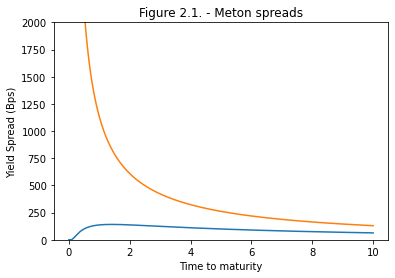

In [59]:
# Coordinates for plotting
x = tau
x_Meton = s(V - C_BS(V, D, tau))
y_Meton = s((V-30) - C_BS((V-30), D, tau))

import matplotlib.pyplot as plt

plt.plot(x, x_Meton)
plt.plot(x, y_Meton)
plt.title('Figure 2.1. - Meton spreads')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(0, 2000)
plt.show()

